<a href="https://colab.research.google.com/github/nicaogr/object_detection/blob/main/SGoaB_Object_Detection_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Object detection demo. Saint George on a Bike 

### Step 1. Environment preparation

In [1]:
!git clone https://github.com/matterport/Mask_RCNN.git
!pip3 install tensorflow==1.14.0 
!pip3 install keras==2.2.5
%cd Mask_RCNN 

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 39.76 MiB/s, done.
Resolving deltas: 100% (562/562), done.
     |████████████████████████████████| 109.3MB 42kB/s 
     |████████████████████████████████| 3.2MB 54.4MB/s 
     |████████████████████████████████| 491kB 53.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 337kB 17.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstall

### Step 2. Import of packages and creation of a list of classes

In [2]:
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.model import mold_image
from numpy import expand_dims
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import tensorflow as tf
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')
classids=["BG","crucifixion","angel","person","crown of thorns", "horse", "dragon","bird","dog","boat","cat","book",
          "sheep","shepherd","elephant","zebra","crown","tiara","camauro","zucchetto","mitre","saturno","skull",  
          "orange","apple","banana","nude","monk","lance","key of heaven", "banner","chalice","palm","sword","rooster",
          "knight","scroll","lily","horn","prayer","tree","arrow","crozier","deer","devil","dove","eagle","hands",
          "head","lion","serpent","stole","trumpet","judith","halo","helmet","shield","jug","holy shroud","god the father",
          "swan", "butterfly", "bear", "centaur","pegasus","donkey","mouse","monkey","cow","unicorn"]
print(len(classids),end='\n')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

70


### Step 3. Download Model Weights

First, download the weights for the model trained on the SGoaB dataset.

The weights are not officially published yet, however it is available for this demo and the file is about 250 megabytes. Download the model weights to a file with the name ‘mask_rcnn_sgoab.h5‘ in your current working directory.

In [3]:
!gdown --id 1IatuDnA8b--JBZu-Y6OCp5TlR3RHpwUN

Downloading...
From: https://drive.google.com/uc?id=1IatuDnA8b--JBZu-Y6OCp5TlR3RHpwUN
To: /content/Mask_RCNN/mask_rcnn_sgoab.h5
257MB [00:04, 57.4MB/s]


### Step 4. Load Model and Make Prediction

First, the model must be defined via an instance MaskRCNN class.

This class requires a configuration object as a parameter. The configuration object defines how the model might be used during training or inference.

In this case, the configuration will only specify the number of images per batch, which will be one, and the number of classes to predict.

We will define the model as type “inference” indicating that we are interested in making predictions and not training. We must also specify a directory where any log messages could be written, which in this case will be the current working directory.

Also we load the weights that we downloaded.

In [4]:
class PredictionConfig(Config):
  NAME = "PREDICTION_cfg"
  # number of classes (background + 69)
  NUM_CLASSES = len(classids)
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  DETECTION_MIN_CONFIDENCE = 0.76

cfg = PredictionConfig()
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)
# load model weights
model_path = '/content/Mask_RCNN/mask_rcnn_sgoab.h5'
model.load_weights(model_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


### Step 5. Download Sample Image

We also need an image in which to detect objects.

We will use a painting of Crucifixion of Museum Metropolitan Art from Wikimedia Commons. 

Download the image to your current working directory with the filename ‘example.jpg‘.

In [5]:
!curl "https://upload.wikimedia.org/wikipedia/commons/1/11/The_Education_of_Achilles%2C_by_James_Barry.jpg" --output example.jpg
!curl "https://upload.wikimedia.org/wikipedia/commons/9/9e/Paolo_de_Matteis_-_The_Annunciation.jpg" --output example2.jpg
!curl "https://upload.wikimedia.org/wikipedia/commons/6/66/The_Crucifixion_MET_DT8851.jpg" --output example3.jpg


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1192k  100 1192k    0     0  20.0M      0 --:--:-- --:--:-- --:--:-- 20.0M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 38869  100 38869    0     0  1997k      0 --:--:-- --:--:-- --:--:-- 1997k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4067k  100 4067k    0     0   9.9M      0 --:--:-- --:--:-- --:--:--  9.9M


### Step 6. Detection

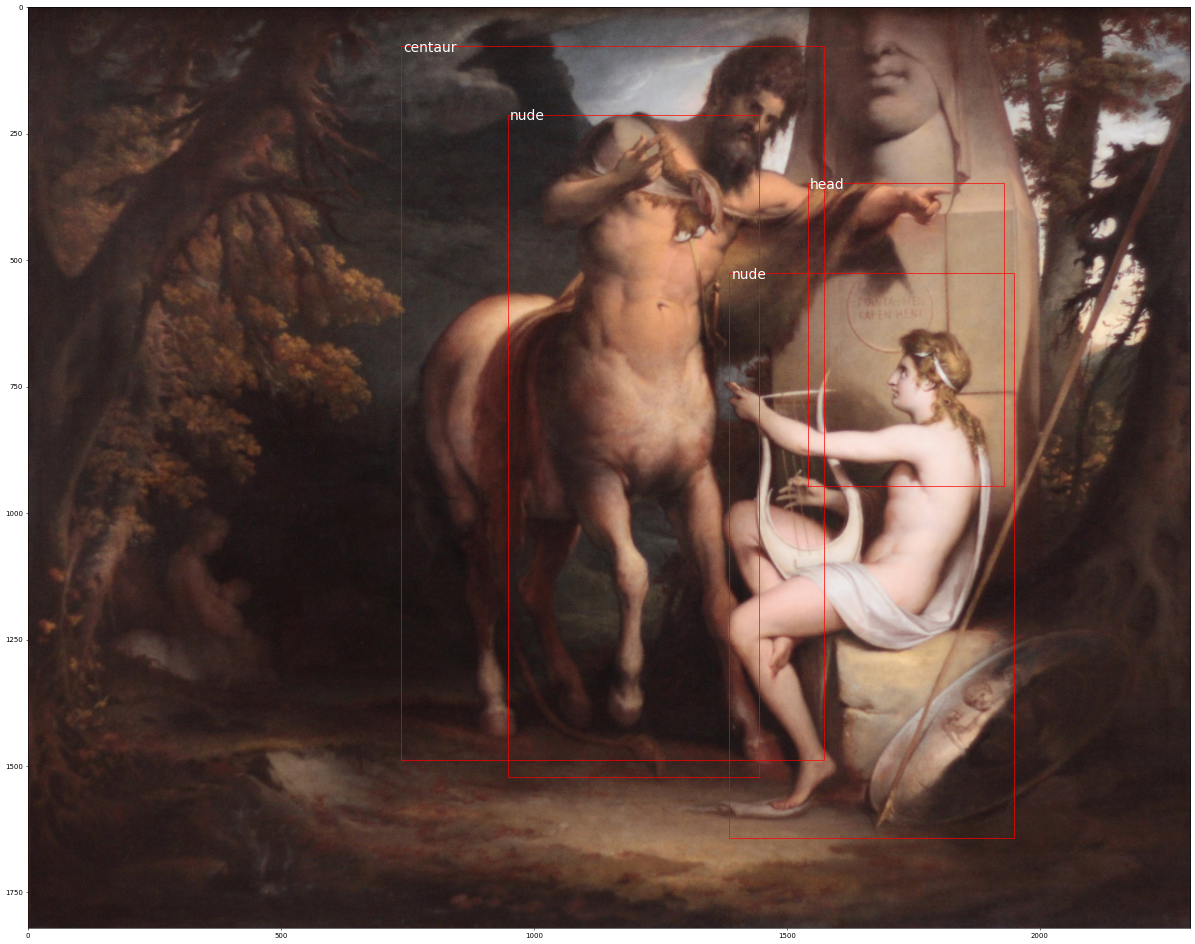

In [6]:
img = load_img("example.jpg")
image = img_to_array(img)
scaled_image = mold_image(image, cfg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model.detect(sample, verbose=0)[0]
fig = plt.figure(num=None, figsize=(30, 30), dpi=50, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, aspect='equal')
# Display the image
ax.imshow(img)
# Create a Rectangle patch
for i in range(0,len(yhat['rois'])):
  y1, x1, y2, x2 = yhat['rois'][i]
  width, height = x2 - x1, y2 - y1
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  ax.add_patch(rect)
  ax.text(x1+5,y1+10,classids[yhat['class_ids'][i]],fontsize=20, color='w')
plt.show()

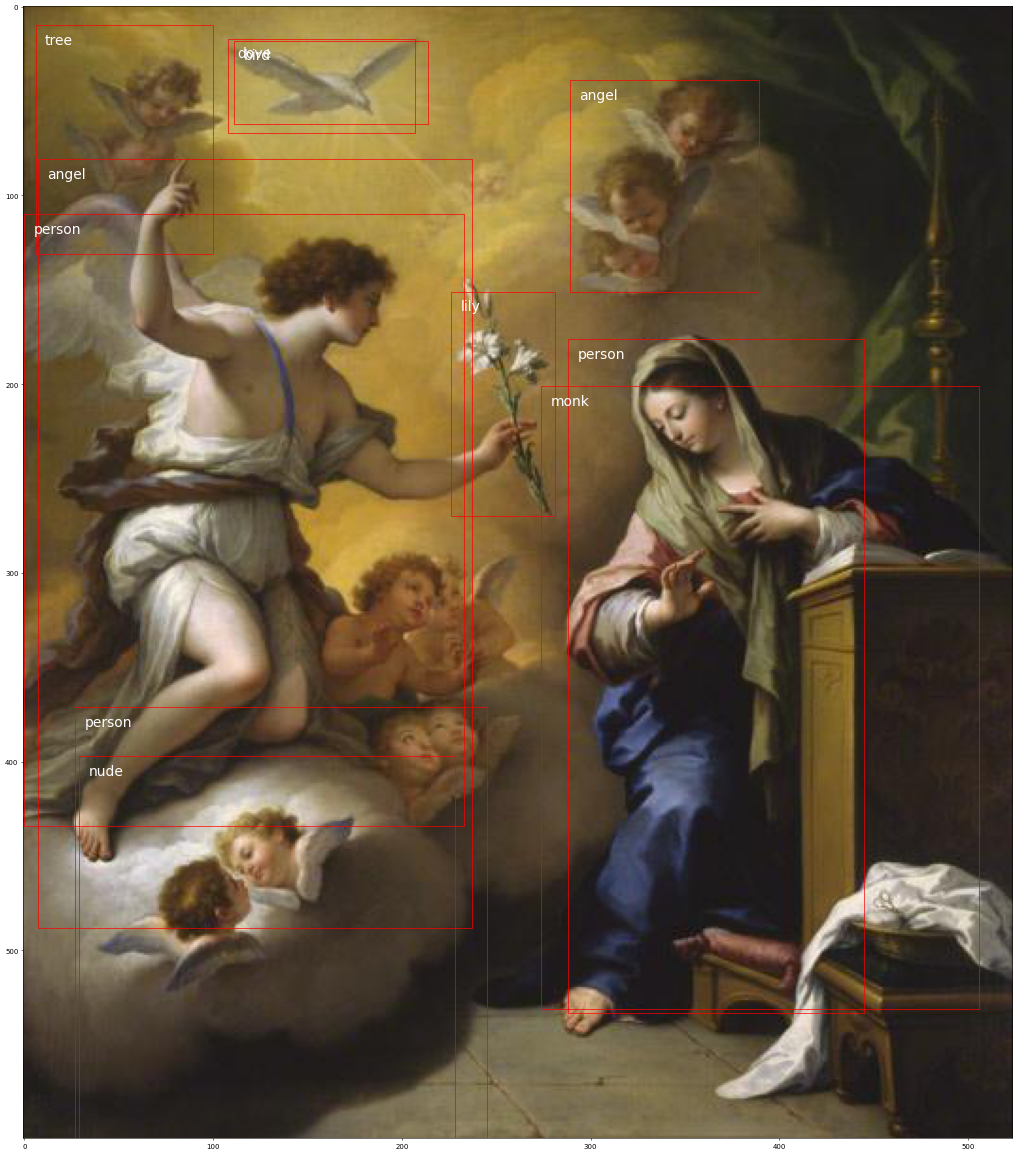

In [7]:
img = load_img("example2.jpg")
image = img_to_array(img)
scaled_image = mold_image(image, cfg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model.detect(sample, verbose=0)[0]
fig = plt.figure(num=None, figsize=(30, 30), dpi=50, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, aspect='equal')
# Display the image
ax.imshow(img)
# Create a Rectangle patch
for i in range(0,len(yhat['rois'])):
  y1, x1, y2, x2 = yhat['rois'][i]
  width, height = x2 - x1, y2 - y1
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  ax.add_patch(rect)
  ax.text(x1+5,y1+10,classids[yhat['class_ids'][i]],fontsize=20, color='w')
plt.show()

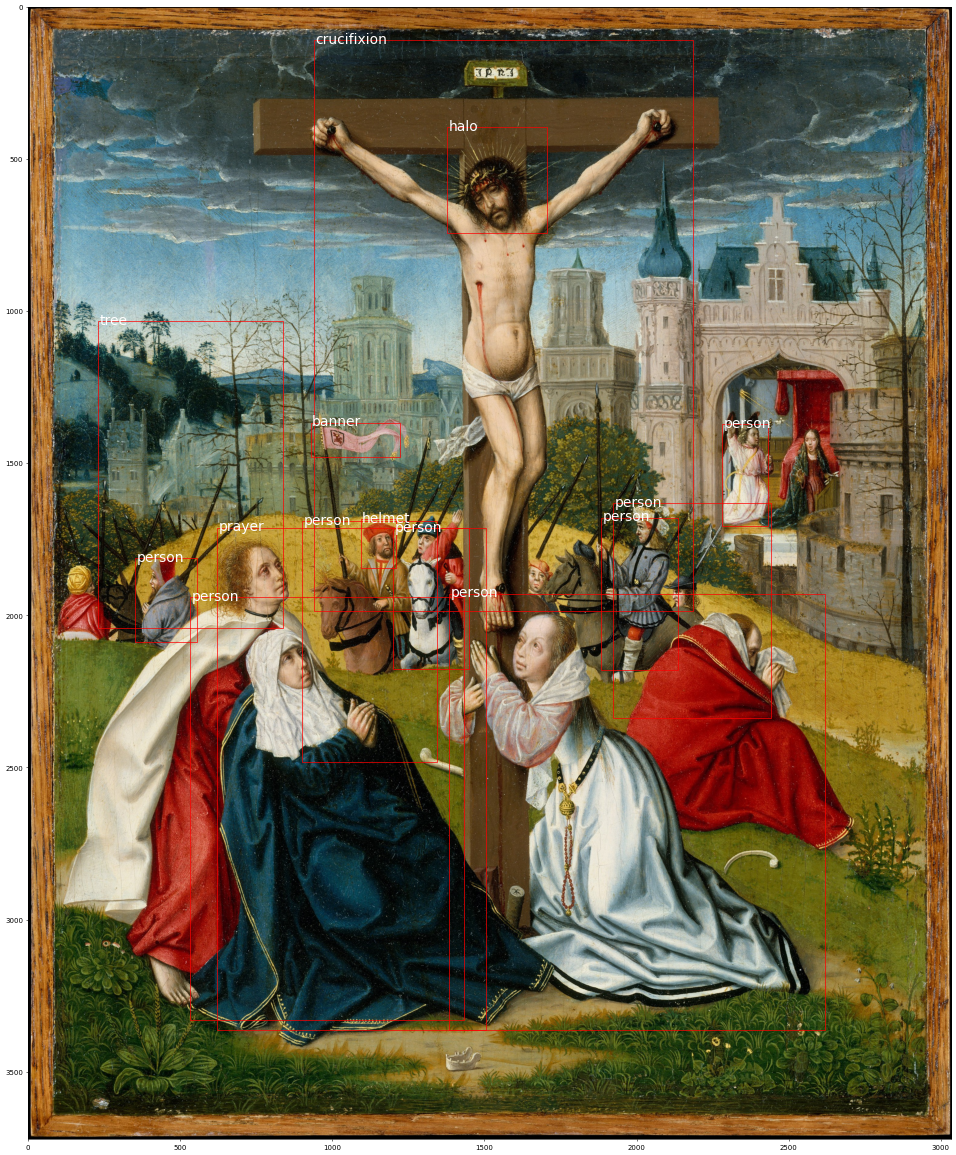

In [8]:
img = load_img("example3.jpg")
image = img_to_array(img)
scaled_image = mold_image(image, cfg)
# convert image into one sample
sample = expand_dims(scaled_image, 0)
# make prediction
yhat = model.detect(sample, verbose=0)[0]
fig = plt.figure(num=None, figsize=(30, 30), dpi=50, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, aspect='equal')
# Display the image
ax.imshow(img)
# Create a Rectangle patch
for i in range(0,len(yhat['rois'])):
  y1, x1, y2, x2 = yhat['rois'][i]
  width, height = x2 - x1, y2 - y1
  rect = Rectangle((x1, y1), width, height, fill=False, color='red')
  ax.add_patch(rect)
  ax.text(x1+5,y1+10,classids[yhat['class_ids'][i]],fontsize=20, color='w')
plt.show()